**Step 1: Upload Your CSV File**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2018_avengers_infinity_war_critic.csv to 2018_avengers_infinity_war_critic.csv


**Step 2: Load and Inspect the Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("2018_avengers_infinity_war_critic.csv")
df.head()


,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,reviewId,scoreSentiment,originalScore
0,2018-04-25,Juanma Fernández París,/critics/juanma-fernandez-paris,fresh,True,False,False,False,/critics/source/2732,El Nuevo Día (Puerto Rico),https://www.elnuevodia.com/entretenimiento/cin...,Infinity War jumps from one incredible sequenc...,2473403,POSITIVE,NaN
1,2018-04-25,Fico Cangiano,/critics/fico-cangiano,fresh,True,False,False,False,/critics/source/2767,CineXpress,http://cinexpresspr.com/site/2018/04/25/resena...,"Expectations surpassed. An ambitious, exhilara...",2473351,POSITIVE,4.5/5
2,2018-04-25,Matt Looker,/critics/matt-looker,fresh,True,False,False,False,/critics/source/2437,TheShiznit.co.uk,http://www.theshiznit.co.uk/review/avengers-in...,It somehow meets every single impossible expec...,2473350,POSITIVE,5/5
3,2018-04-25,Matthew Turner,/critics/matthew-turner,fresh,True,False,False,False,/critics/source/2802,iNews.co.uk,https://inews.co.uk/culture/film/avengers-infi...,Epic in scope and a stunning achievement in bl...,2473349,POSITIVE,5/5
4,2018-04-25,Danielle Solzman,/critics/danielle-solzman,fresh,True,False,False,False,/critics/source/2921,Solzy at the Movies,http://www.solzyatthemovies.com/2018/04/24/ave...,The stakes have never been higher with the rel...,2473345,POSITIVE,NaN


In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

df['cleaned_quote'] = df['quote'].apply(preprocess)
df[['quote', 'cleaned_quote']].head()

,quote,cleaned_quote
0,Infinity War jumps from one incredible sequenc...,infinity war jumps incredible sequence dazzlin...
1,"Expectations surpassed. An ambitious, exhilara...",expectations surpassed ambitious exhilarating ...
2,It somehow meets every single impossible expec...,meets single impossible expectation fair youre...
3,Epic in scope and a stunning achievement in bl...,epic scope stunning achievement blockbuster ci...
4,The stakes have never been higher with the rel...,stakes higher release marvel studios avengers ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_quote'])
y = df['scoreSentiment']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 87.76%


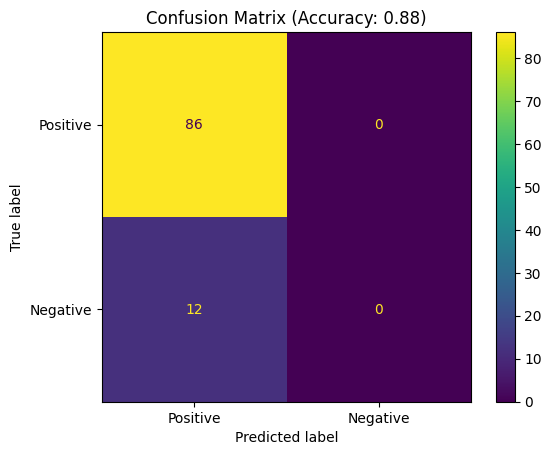

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["POSITIVE", "NEGATIVE"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot()
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_quote'])
y = df['scoreSentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

Naive Bayes Accuracy: 0.8775510204081632


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

df['label'] = df['scoreSentiment'].map({'POSITIVE': 1, 'NEGATIVE': 0})

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_quote'])

sequences = tokenizer.texts_to_sequences(df['cleaned_quote'])
padded = pad_sequences(sequences, maxlen=100, padding='post')

X = padded
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_matrix = np.zeros((10000, 100))
word_index = tokenizer.word_index
for word, i in word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

--2025-05-02 03:20:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-02 03:20:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-02 03:20:38--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov